In [1]:
import os 
import tensorflow as tf
import numpy as np
from nets import RNNC
from tqdm import tqdm
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

data, labels = np.load("ProfilesSet/data.npy"), np.load("ProfilesSet/label.npy")
dat_set = tf.data.Dataset.from_tensor_slices((data,labels))
net = RNNC(return_sequences=False)


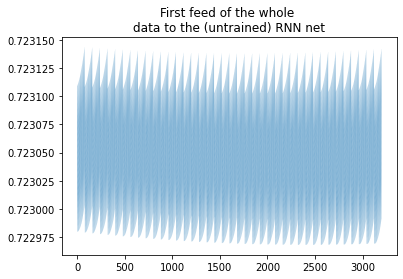

In [11]:
plt.title("First feed of the whole \ndata to the (untrained) RNN net")
plt.plot(np.squeeze(net(data)), linewidth=0.05)
plt.savefig("variations.png")

In [19]:
import os 
os.makedirs("grads")

In [20]:
l=[]
for k in tqdm(range((3*10**4)+1)):
    if k in stoppings:
        lo, gr = net.train_step(data, labels, clipping=True,return_gradients=True)
        np.save("grads/{}".format(k),gr)
        net.save_weights("net/"+str(k))        
        l.append(lo)
    else:
        l.append(net.train_step(data, labels, clipping=True))

100%|██████████| 30001/30001 [05:56<00:00, 84.20it/s]


In [77]:
means=[]
maxs=[]
for ep in stoppings:
    gr = np.load("grads/{}.npy".format(ep), allow_pickle=True)
    means.append([np.mean(gr[k].numpy()) for k in range(len(gr))])
    maxs.append([np.max(np.abs(gr[k].numpy())) for k in range(len(gr))])    

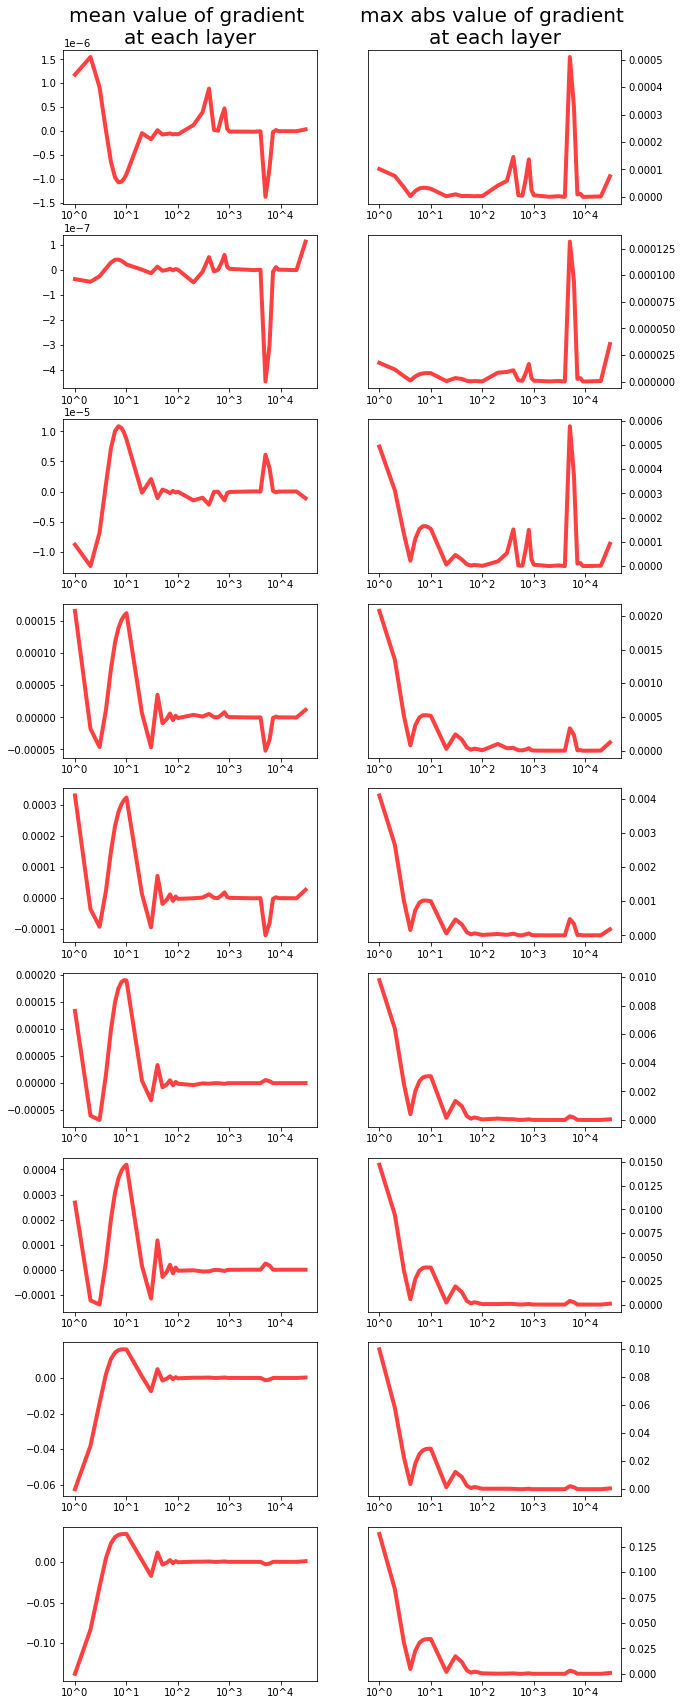

In [88]:
ti=[]
for k in np.log10(stoppings):
    if k in list(range(10)):
        ti.append(k)

plt.figure(figsize=(10,30))
axs={}
for k in range(9):
    axs[str(k)] = plt.subplot2grid((9,2),(k,0))
    axs[str(k)].plot(np.log10(stoppings),np.array(means)[:,k], label="mean gradient at layer {}".format(k), color="red",alpha=0.75, linewidth=4)
    axs[str(k)].set_xticks(ti)    
    axs[str(k)].set_xticklabels(["10^{}".format(int(kk)) for kk in ti])
    if k==0:
        axs[str(k)].set_title("mean value of gradient \nat each layer", size=20)
    axs[str(k)] = plt.subplot2grid((9,2),(k,1))
    axs[str(k)].plot(np.log10(stoppings),np.array(maxs)[:,k], label="max absolute value of gradient at layer {}".format(k), color="red",alpha=0.75, linewidth=4)
    axs[str(k)].set_xticks(ti)    
    axs[str(k)].yaxis.tick_right()
    axs[str(k)].set_xticklabels(["10^{}".format(int(kk)) for kk in ti])
    if k==0:
        axs[str(k)].set_title("max abs value of gradient \nat each layer", size=20)
plt.savefig("evolution.png")